In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [8]:
diwali_df = pd.read_csv(r'D:\Data Analysis complete\data analysis notes\Data analysis project\diwali sales analysis\Diwali Sales Data.csv',encoding= 'unicode_escape')

In [9]:
diwali_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Information

In [10]:
diwali_df.shape

(11251, 15)

In [14]:
#finding out the information of the data
diwali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#  Data Cleaning

In [16]:
#Drop unrelated rows/columns
diwali_df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [18]:
#check for null values
pd.isnull(diwali_df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
#Drop Null Values
diwali_df.dropna(inplace = True)

In [20]:
# Change Data types
diwali_df['Amount'] = diwali_df['Amount'].astype('int')

In [22]:
diwali_df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
#use describe() for specific columns
diwali_df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

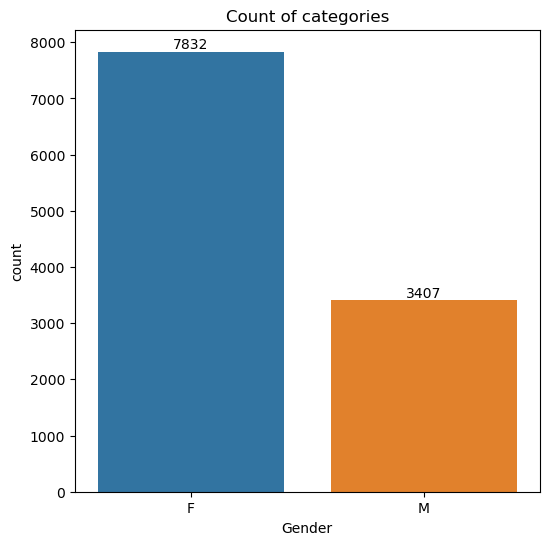

In [28]:
# Who are the most buyers
#countplot
plt.figure(figsize = (6,6))
plt.title("Count of categories")
ax = sns.countplot(x = 'Gender', data =diwali_df);
for bars in ax.containers:
    ax.bar_label(bars)

In [45]:
sales_gen = diwali_df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending = False)

In [30]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


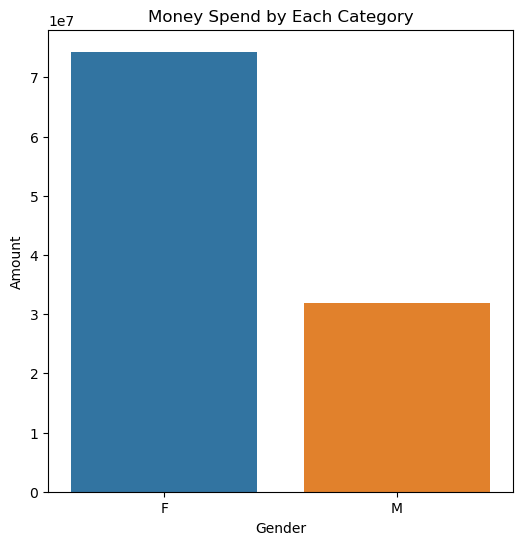

In [69]:
# Comparing Amount spend by each category 
plt.figure(figsize = (6,6))
plt.title("Money Spend by Each Category")
sns.barplot(x= 'Gender', y='Amount', data = sales_gen);

From above graph we can see that most of the buyers are female and purchasing power of female is more than men

# Age

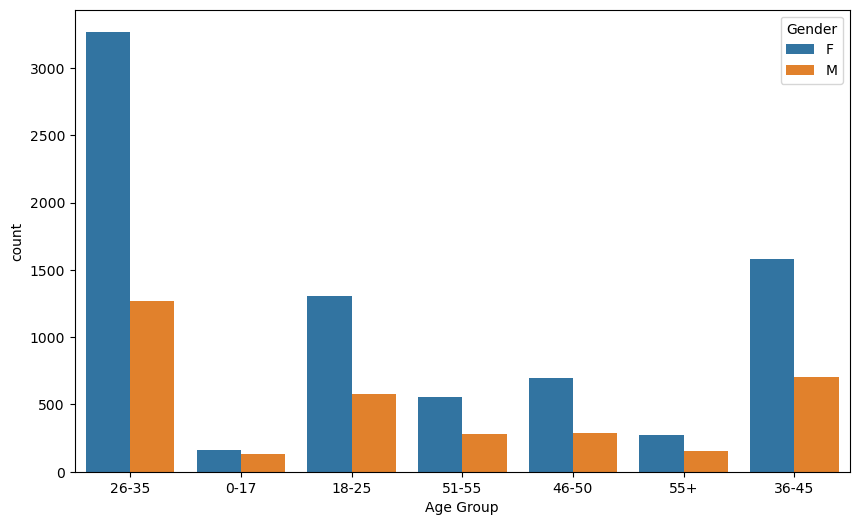

In [43]:
# Which Age Group most buyer belongs
plt.figure(figsize = (10,6))
sns.countplot(data = diwali_df, x = 'Age Group', hue = 'Gender');

In [46]:
# Total Amount vs Age group 
sales_age = diwali_df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending =False)

In [47]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


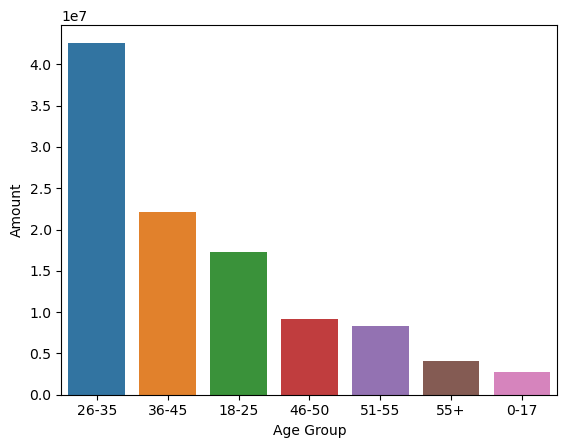

In [49]:
sns.barplot(x = 'Age Group', y= 'Amount',  data = sales_age);

# State

In [57]:
#Total number of orders from top 10 states 
sales_state = diwali_df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by ='Orders', ascending =False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


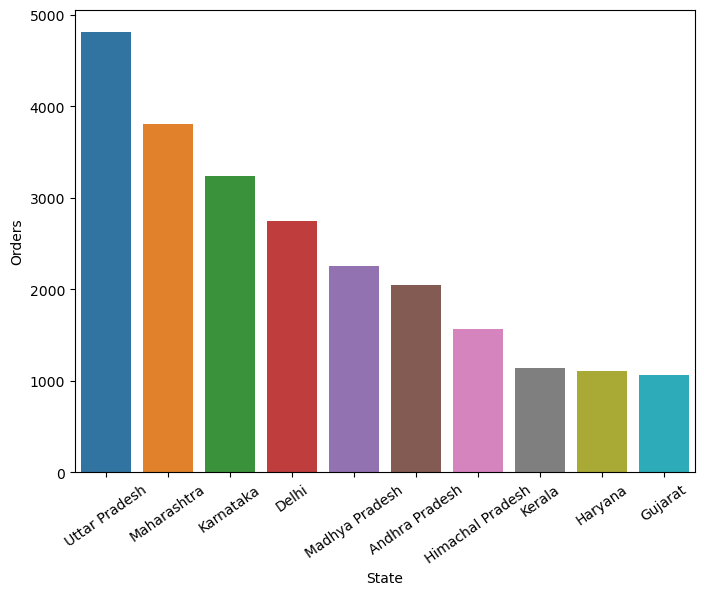

In [62]:
plt.figure(figsize = (8,6))
sns.barplot(data = sales_state, x= 'State', y= 'Orders');
plt.xticks(rotation = 35)
plt.show()

In [63]:
# Total Amount spend by top 10 states
sales_state = diwali_df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending =False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


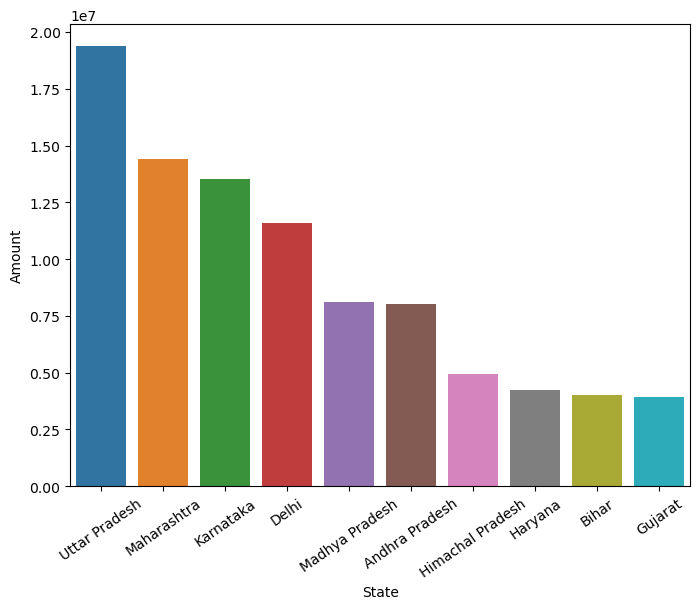

In [64]:
plt.figure(figsize = (8,6))
sns.barplot(data = sales_state, x= 'State', y= 'Amount');
plt.xticks(rotation = 35)
plt.show()

# Marital Status

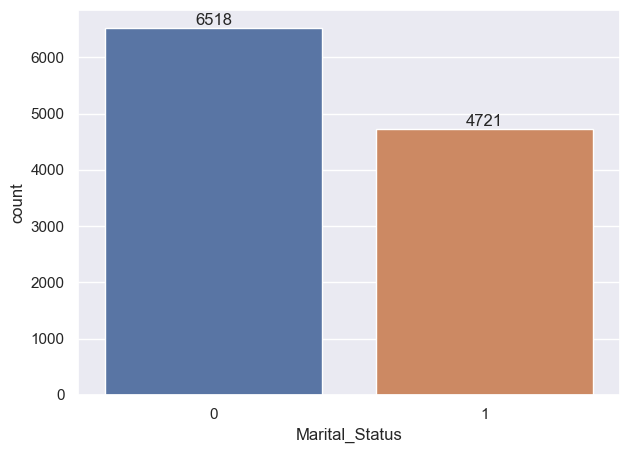

In [75]:
ax = sns.countplot(x = 'Marital_Status', data =diwali_df);
sns.set(rc = {'figure.figsize':(3,3)})
for bars in ax.containers:
    ax.bar_label(bars)

In [76]:
sales_state = diwali_df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending =False)
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


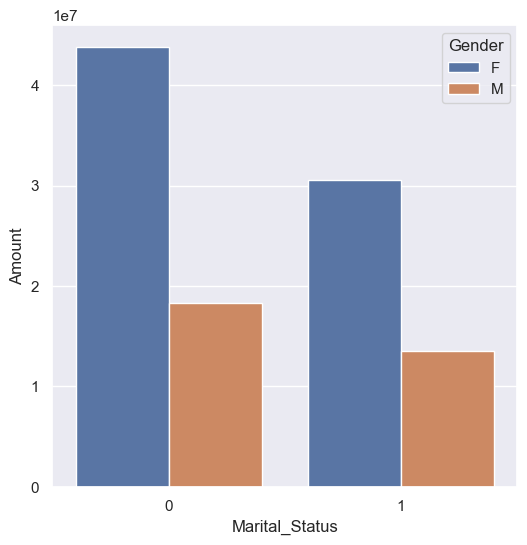

In [78]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.barplot(data = sales_state, x= 'Marital_Status', y= 'Amount', hue = 'Gender');

# Product Category

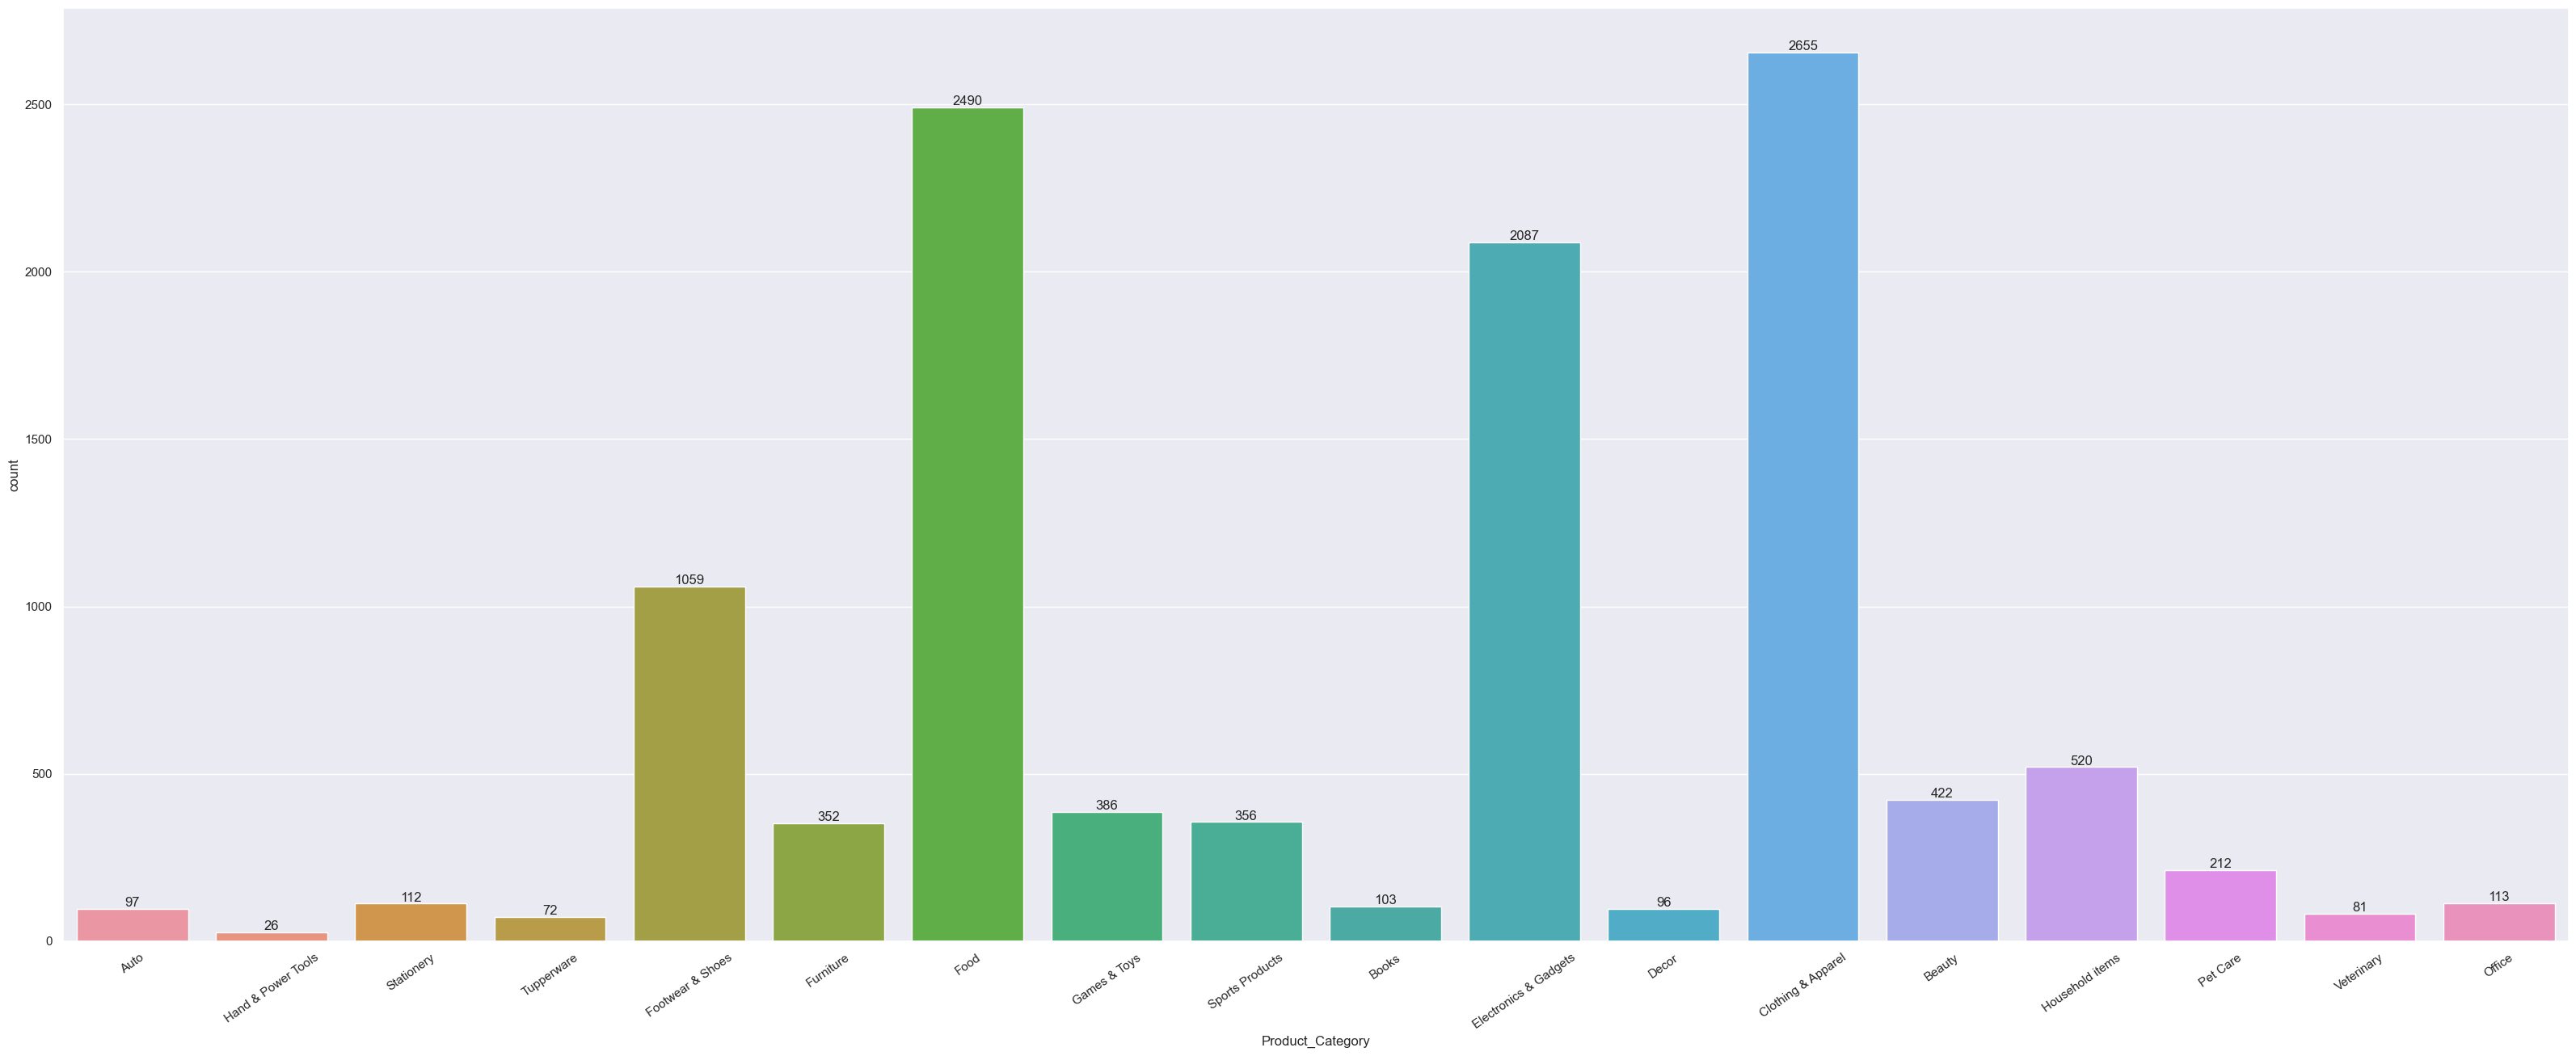

In [89]:
ax = sns.countplot(x = 'Product_Category', data =diwali_df);
sns.set(rc = {'figure.figsize':(40,40)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 35)
plt.show()

In [91]:
sales_state = diwali_df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending =False)
sales_state

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


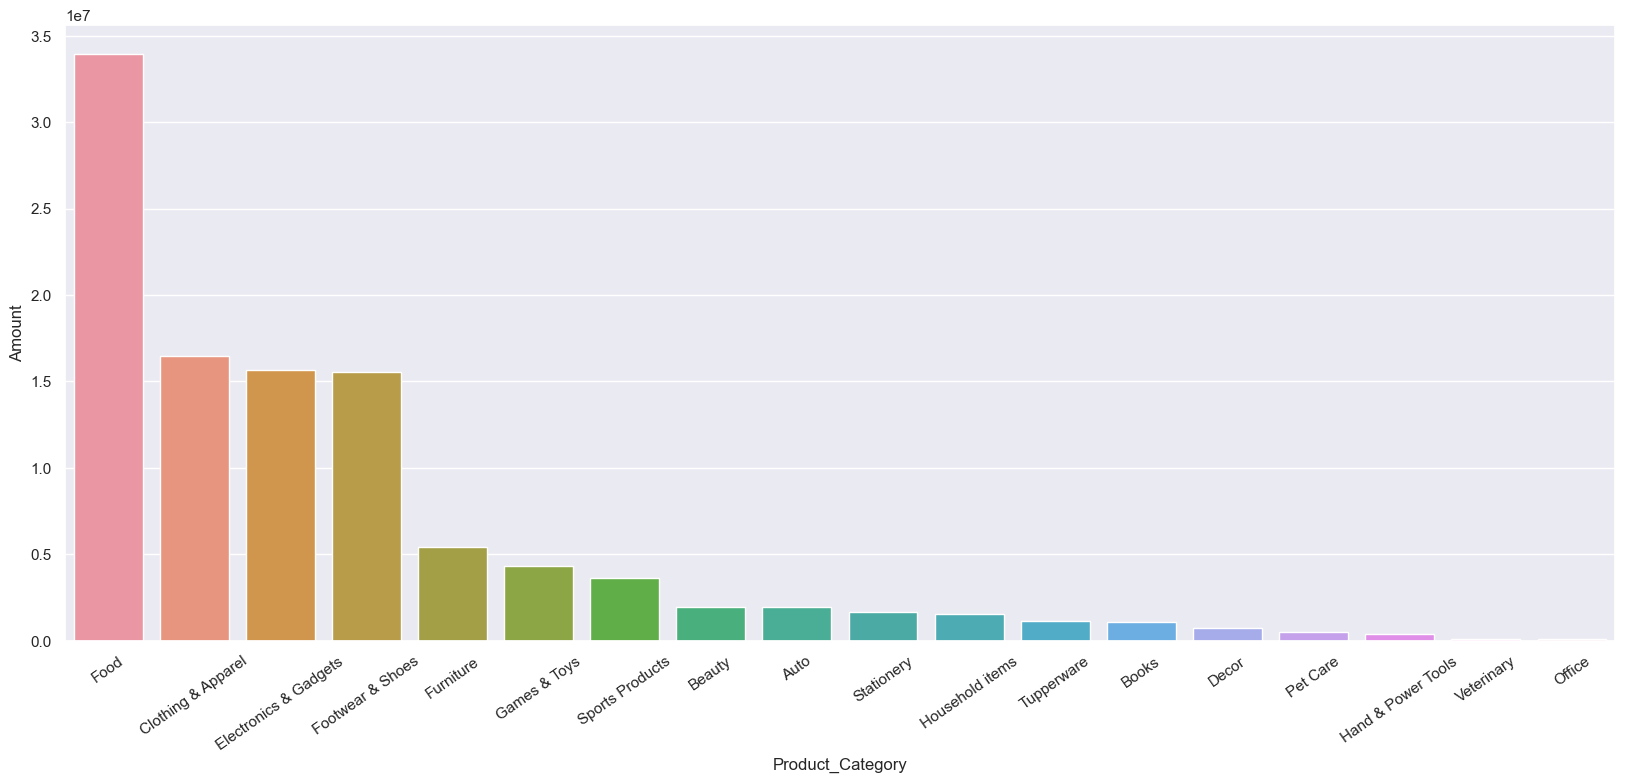

In [96]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x= 'Product_Category', y= 'Amount');
plt.xticks(rotation = 35)
plt.show()

# Conclusion